Clustering techniques apply when there is no class to be predicted but rather when the instances are to be divided into natural groups.

— Page 141, Data Mining: Practical Machine Learning Tools and Techniques, 2016.



Clustering can be used to find similarities or discover patterns in datasets

In [55]:
pip install kneed

In [56]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from kneed import KneeLocator


##Elbow Method for determining optimum number of clusters in K-means clustering

In [17]:
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


split of categorical and continuous features

In [22]:
categorical_features = iris_df.select_dtypes(include=['category', 'object']).columns
continuous_features = iris_df.select_dtypes(include=["number"]).columns.tolist()

Descriptive statistics

In [28]:
iris_df[continuous_features].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


convert the categorical features to binary using pandas get dummies

In [32]:
for col in categorical_features:
    dummies = pd.get_dummies(iris_df[col], prefix=col)
    iris_df = pd.concat([iris_df, dummies], axis=1)
    iris_df.drop(col, axis=1, inplace=True)

iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


scale the continuous features using scikit-learn’s MinMaxScaler to give equal importance to all features

In [33]:
mms = MinMaxScaler()
mms.fit(iris_df)
data_transformed = mms.transform(iris_df)

In [34]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

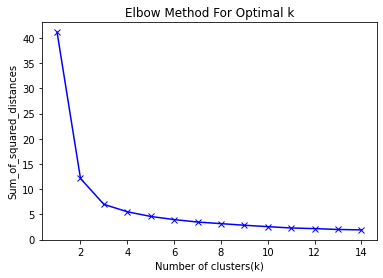

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Use Python package "kneed" to identify the elbow point programmatically

In [61]:
kl = KneeLocator(range(1, 15), Sum_of_squared_distances, curve="convex", direction="decreasing")
kl.elbow

3

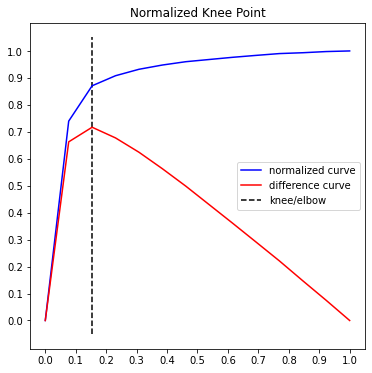

In [67]:
kl.plot_knee_normalized()

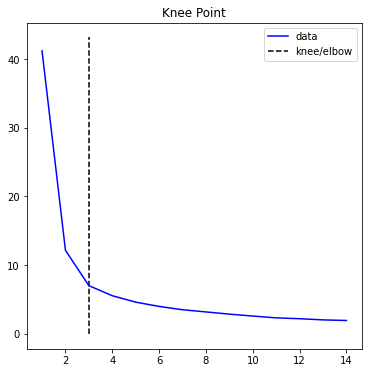

In [69]:
# Raw data and knee.
kl.plot_knee()

Based on above visualization, the elbow occurs between k=2 and k=4. We now create a kmeans model for prediction of clusters to which each data point would belong.

In [62]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = kl.elbow, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

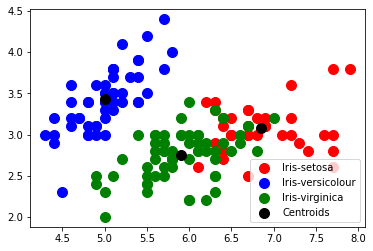

In [65]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

##Citation

Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior Ville Satopa † , Jeannie Albrecht† , David Irwin‡ , and Barath Raghavan§ †Williams College, Williamstown, MA ‡University of Massachusetts Amherst, Amherst, MA § International Computer Science Institute, Berkeley, CA